# Regressão Linear Simples e Correlação - Com uso de Markdown e R

14-1 - Um engenheiro químico está estudando o efeito da temperatura de operação do processo sobre o resultado da produção. O estudo resulta nos seguintes dados:

| Temperatura, C (x) | 100 | 110 | 120 | 130 | 140 | 150 | 160 | 170 | 180 | 190 |
|:------------------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|   Resultado, (y)   |  45 |  51 |  54 |  61 |  66 |  70 |  74 |  78 |  85 |  89 |

Determine:

+ a) Crie um dataframe com os dados acima;
+ b) Determine o diagrama de dispersão do (resultado(y) versus temperatura(x)); 
+ c) Encontre os valores de $\beta_0$ e $\beta_1$;
+ d) Os valores de $\beta_0$ e $\beta_1$ são signficativos, use o $summary$ para analisar;
+ e) Determine o intervalo de confiança para $\beta_0$ e $\beta_1$ ao nível de 95\% de confiança;
+ f) Determine um intervalo de confiança para a resposta média $\hat{y}$, considerando $x_0=140$;
+ g) Apresente um dataframe com os resultados de y, x, $\hat{y}$ e residuos;
+ h) Construa um gráfico acrescentando ao gráfico, além da reta de regressão ajustada, segmentos de reta represetando os resíduos;

In [1]:
# a) Criando o dataframe

temperatura =c(100,110,120,130,140,150,160,170,180,190)
resultado =c(45,51,54,61,66,70,74,78,85,89)

dados=data.frame(temperatura,resultado)
dados


temperatura,resultado
100,45
110,51
120,54
130,61
140,66
150,70
160,74
170,78
180,85
190,89


$\color{red}{\text{b}}$ -  O diagrama de dispersão é apresentado  com a utização do código em R dado por: `plot(temperatura,resultado)`

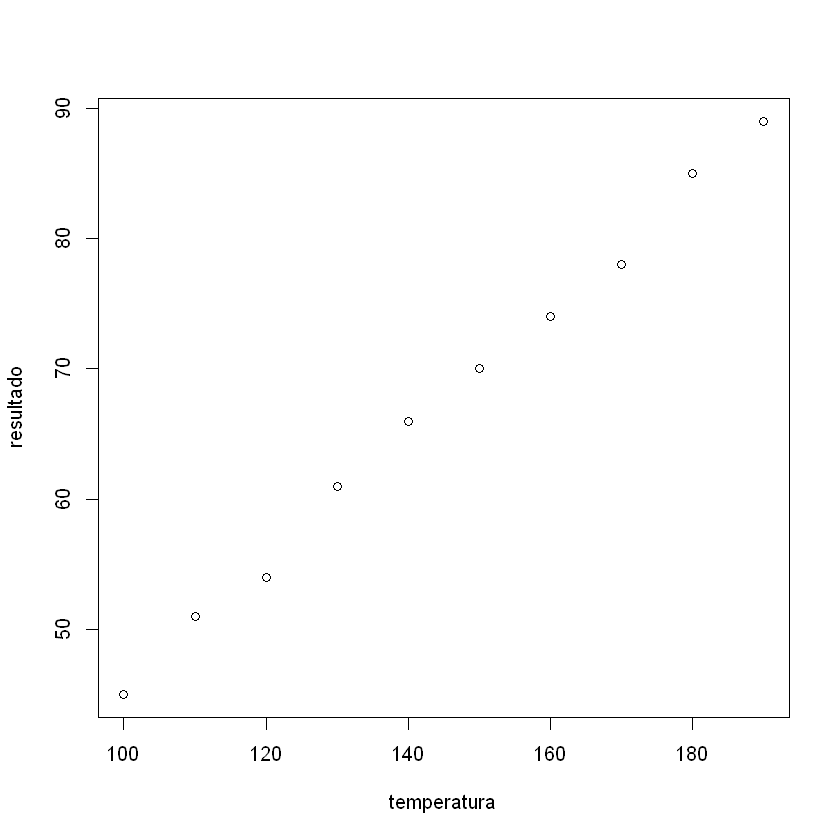

In [2]:
plot(temperatura,resultado) 

O gráfico de dispersão sugere uma relação linear entre as variáveis **temperatura** e **resposta**.

$\color{red}{\text{c)}}$ Os valores de $\beta_0$ e $\beta_1$ são apresentados no R pelo comando `lm(y~x)`, em que y é a variável ***resultado*** e x é a variável ***temperatura***.

In [3]:
reglin <- lm(resultado~temperatura,dados)
reglin$coefficients

(Intercept) temperatura 
 -2.7393939   0.4830303

Portanto o valore de $\beta_0=-2,739$ e $\beta_1=0,483$.

$\color{red}{\text{d)}}$ -  Para verificar se os coeficientes do modelo de regressão linear são signficativos, deveremos analisar a significância do modelo em luz da ANOVA ou em termos dos coeficientes encontrados. Se usarmos a signficância em relação aos coeficientes encontrados, usaremos a seguinte regra de decisão, usando um nível de significância de 5%.


\begin{array}{ll}
         H_0: \beta_i = 0 & \mbox{Coeficiente não é significativo};\\
        H_1: \beta_i \neq 0 & \mbox{Coeficiente é signficativo}.\end{array}

Portanto, usa-se o comando $summary()$, para encontrar a resposta usando o R. - $\color{red}{\text{Rejeita-se H0 se p-valor <= 0,05}}$. 


In [4]:
summary(reglin)


Call:
lm(formula = resultado ~ temperatura, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3758 -0.5591  0.1242  0.7470  1.1152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.73939    1.54650  -1.771    0.114    
temperatura  0.48303    0.01046  46.169 5.35e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9503 on 8 degrees of freedom
Multiple R-squared:  0.9963,	Adjusted R-squared:  0.9958 
F-statistic:  2132 on 1 and 8 DF,  p-value: 5.353e-11


Portanto, ao analisar $\beta_0=-2,73939$  foi constatado a não significativo do parâmetro, visto que o p-valor associado foi de 0,144 levando a não rejeição da hipótese nula em contrapartida $\beta_1=0,48303$ é considerado signficativo, visto que o p-valor (5.35e-11) nos levado a rejeição da hipótese nula ao nível de 5% de signficância, ou seja, a variável temperatura influencia significativamente a variável resultado.

$\color{red}{\text{e)}}$ -  Os intervalos de confiança para $\beta_0$ e $\beta_1$ ao nível de 95% de confiança são apresentados a seguir, através do comando $confint()$.

In [5]:
confint(reglin)

,2.5 %,97.5 %
(Intercept),-6.3056292,0.8268413
temperatura,0.4589044,0.5071562


Portanto o intervalo de confiança para $\beta_1$ é dado por: $0.4589044 \leq \beta_1 \leq 0.5071562$.

$\color{red}{\text{f)}}$ - O intervalo de confiança para a resposta média $\hat{y}$, considerando $x_0=140$ fixo é dado no R por $confidence$;

In [6]:
x0=data.frame(temperatura=140)
predict(reglin, x0,interval="confidence")

fit,lwr,upr
64.88485,64.18146,65.58823


Portanto, o intervalo de confiança para a resposta média de $\hat{y}$ considerando $x_0=140$ é dado por  $64.18146 \leq E(y|x_0=140)\leq 65.58823$.

$\color{red}{\text{g)}}$ - Um data frame com os resultado $y, x, \hat{y}, erro$, são apresentados a seguir:

In [7]:
estimados <- predict(reglin)
residuos <- resid(reglin)

result <- data.frame(          #criando um data.frame
          temperatura,         #variável independente
          resultado,           #variável dependente
          estimados,           #valores estimados
          residuos)            #residuos
result

temperatura,resultado,estimados,residuos
100,45,45.56364,-0.56363636
110,51,50.39394,0.60606061
120,54,55.22424,-1.22424242
130,61,60.05455,0.94545455
140,66,64.88485,1.11515152
150,70,69.71515,0.28484848
160,74,74.54545,-0.54545455
170,78,79.37576,-1.37575758
180,85,84.20606,0.79393939
190,89,89.03636,-0.03636364


$\color{red}{\text{h)}}$ - O gráfico da reta de regressão ajustada com segmentos de reta represetando os resíduos é apresentado a seguir:

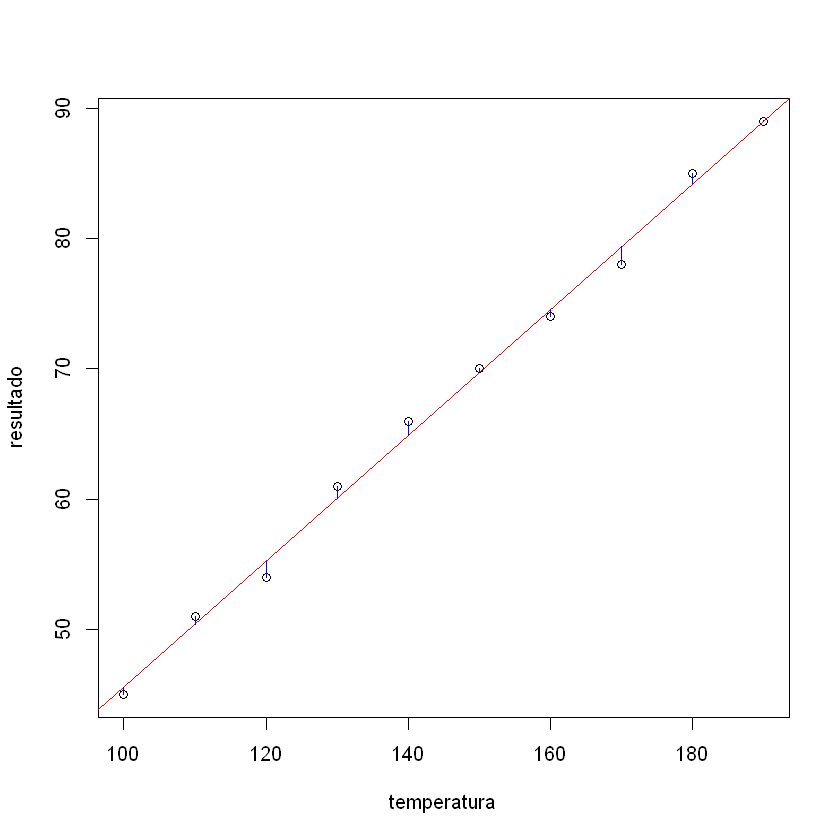

In [8]:
plot(temperatura,resultado)               #diagrama de dispersão
abline(reglin,                            #reta de regressão ajustada
       col=2)                             #cor vermelha

segments(                                 #desenha segmentos de reta    
  result$temperatura,                     #de (coord.x)
  result$resultado,                       #de (coord.y)
  result$temperatura,                     #para (coord. x)
  result$estimados,                       #para (coord. y)
  col=4)                                  #cor azul
